<a href="https://colab.research.google.com/github/rashmi29032000/PhonePe-Pulse/blob/main/Phonepe_pulse_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Extract the data from phonepe pulse github repository through the scripting and clone it

In [8]:
#clone the data from phoneoe pulse github
! git clone "http://github.com/PhonePe/Pulse.git"

Cloning into 'Pulse'...
remote: Enumerating objects: 17904, done.
remote: Counting objects: 100% (2702/2702), done.
remote: Compressing objects: 100% (2153/2153), done.
remote: Total 17904 (delta 842), reused 2301 (delta 507), pack-reused 15202 (from 1)
Receiving objects: 100% (17904/17904), 26.21 MiB | 14.21 MiB/s, done.
Resolving deltas: 100% (8584/8584), done.
Updating files: 100% (9029/9029), done.


Transform the data into suitable format

In [9]:
import pandas as pd
import json
import os

**Aggregated Transaction**

In [10]:
path1 = "/content/Pulse/data/aggregated/transaction/country/india/state"
agg_trans_list = os.listdir(path1)
# agg_trans_list
clm = {'State': [], 'Year': [], 'Quater': [], 'Transaction_type': [], 'Transaction_count': [], 'Transaction_amount': []}
for i in agg_trans_list:
  p_i = path1+"/"+i
  agg_yr = os.listdir(p_i)
  for j in agg_yr:
    p_j = p_i+"/"+j
    agg_yr_list = os.listdir(p_j)
    for k in agg_yr_list:
      p_k = p_j+"/"+k
      data = open(p_k, 'r')
      A = json.load(data)
      for z in A['data']['transactionData']:
        Name = z['name']
        count =z['paymentInstruments'][0]['count']
        amount=z['paymentInstruments'][0]['amount']
        clm['Transaction_type'].append(Name)
        clm['Transaction_count'].append(count)
        clm['Transaction_amount'].append(amount)
        clm['State'].append(i)
        clm['Year'].append(j)
        clm['Quater'].append(int(k.strip('.json')))
#create a dataframe
pd.DataFrame(clm)
df_agg = pd.DataFrame(clm)

In [11]:
# Save df_agg to CSV
df_agg.to_csv('phonepe_agg_transaction.csv', index=False)
print("Saved: phonepe_agg_transaction.csv")


Saved: phonepe_agg_transaction.csv


In [12]:
df_agg.head()

State  Year  Quater          Transaction_type  Transaction_count  \
0  chandigarh  2022       1         Merchant payments            4511757   
1  chandigarh  2022       1     Peer-to-peer payments            3012464   
2  chandigarh  2022       1  Recharge & bill payments            1046187   
3  chandigarh  2022       1        Financial Services               7228   
4  chandigarh  2022       1                    Others              22855   

   Transaction_amount  
0        3.264575e+09  
1        1.115070e+10  
2        7.313480e+08  
3        1.353864e+07  
4        1.482913e+07

In [13]:
#insert the dataframe into sql lite base
import sqlite3
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [14]:
#create a table in the database
c.execute('''CREATE TABLE IF NOT EXISTS TRANSACTION_DATA(
  STATE TEXT,
  YEAR TEXT,
  QUATER TEXT,
  TRANSACTION_TYPE TEXT,
  TRANSACTION_COUNT TEXT,
  TRANSACTION_AMOUNT TEXT
)''')

In [15]:
#INSERT all the data into table
c.executemany('INSERT INTO TRANSACTION_DATA VALUES(?,?,?,?,?,?)',
              zip(clm['State'], clm['Year'], clm['Quater'], clm['Transaction_type'], clm['Transaction_count'], clm['Transaction_amount']))

In [16]:
#show the data in table format
x = c.execute('SELECT * FROM TRANSACTION_DATA')
x = c.fetchall()
for row in x:
  print(row)
print()

('chandigarh', '2022', '1', 'Merchant payments', '4511757', '3264574793.45644')
('chandigarh', '2022', '1', 'Peer-to-peer payments', '3012464', '11150701028.6057')
('chandigarh', '2022', '1', 'Recharge & bill payments', '1046187', '731347957.215207')
('chandigarh', '2022', '1', 'Financial Services', '7228', '13538635.5629482')
('chandigarh', '2022', '1', 'Others', '22855', '14829134.9996867')
('chandigarh', '2022', '3', 'Merchant payments', '7665907', '4713972532.82215')
('chandigarh', '2022', '3', 'Peer-to-peer payments', '4423590', '14788179156.482')
('chandigarh', '2022', '3', 'Recharge & bill payments', '1360342', '1033530639.93608')
('chandigarh', '2022', '3', 'Financial Services', '8868', '9918740.02096759')
('chandigarh', '2022', '3', 'Others', '19466', '14156668.1446916')
('chandigarh', '2022', '2', 'Merchant payments', '6136803', '3919372475.56057')
('chandigarh', '2022', '2', 'Peer-to-peer payments', '3489382', '12549248085.1114')
('chandigarh', '2022', '2', 'Recharge & bill 

In [17]:
#commit the chnages
con.commit()
con.close()

**Aggregated User Data (agg_user)**


In [18]:
# Path to aggregated user data
path2 = "/content/Pulse/data/aggregated/user/country/india/state"
agg_user_list = os.listdir(path2)

clm_user = {'State': [], 'Year': [], 'Quater': [], 'Brand': [], 'Count': [], 'Percentage': []}
for i in agg_user_list:
    p_i = os.path.join(path2, i)
    agg_yr = os.listdir(p_i)
    for j in agg_yr:
        p_j = os.path.join(p_i, j)
        agg_yr_list = os.listdir(p_j)
        for k in agg_yr_list:
            p_k = os.path.join(p_j, k)
            with open(p_k, 'r') as data:
                B = json.load(data)
                if B['data']['usersByDevice'] is not None:
                    for z in B['data']['usersByDevice']:
                        clm_user['State'].append(i)
                        clm_user['Year'].append(j)
                        clm_user['Quater'].append(int(k.strip('.json')))
                        clm_user['Brand'].append(z['brand'])
                        clm_user['Count'].append(z['count'])
                        clm_user['Percentage'].append(z['percentage'])

# Create DataFrame
df_user = pd.DataFrame(clm_user)




In [19]:
df_user.to_csv('phonepe_user.csv', index=False)
print("Saved: phonepe_user.csv")

Saved: phonepe_user.csv


In [20]:
df_user.head()

State  Year  Quater    Brand   Count  Percentage
0  chandigarh  2022       1   Xiaomi  118077    0.218036
1  chandigarh  2022       1     Vivo  103673    0.191438
2  chandigarh  2022       1  Samsung  100254    0.185125
3  chandigarh  2022       1     Oppo   76330    0.140948
4  chandigarh  2022       1    Apple   45080    0.083243

In [21]:
#insert the dataframe into sql lite base
import sqlite3
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [22]:
#create a table in the database
c.execute('''CREATE TABLE IF NOT EXISTS USER_DATA(
    STATE TEXT,
    YEAR TEXT,
    QUATER TEXT,
    BRAND TEXT,
    COUNT INTEGER,
    PERCENTAGE REAL
)''')

In [23]:
#INSERT all the data into table
c.executemany('INSERT INTO USER_DATA VALUES(?,?,?,?,?,?)',
              zip(clm_user['State'], clm_user['Year'], clm_user['Quater'], clm_user['Brand'], clm_user['Count'], clm_user['Percentage']))

In [24]:
#show the data in table format
x = c.execute('SELECT * FROM USER_DATA')
x = c.fetchall()
for row in x:
    print(row)
print()

('chandigarh', '2022', '1', 'Xiaomi', 118077, 0.2180356717490015)
('chandigarh', '2022', '1', 'Vivo', 103673, 0.19143789389325805)
('chandigarh', '2022', '1', 'Samsung', 100254, 0.18512452243471966)
('chandigarh', '2022', '1', 'Oppo', 76330, 0.14094754121972342)
('chandigarh', '2022', '1', 'Apple', 45080, 0.08324269825999124)
('chandigarh', '2022', '1', 'Realme', 30911, 0.057078860823305)
('chandigarh', '2022', '1', 'OnePlus', 15554, 0.028721316076661577)
('chandigarh', '2022', '1', 'Motorola', 8378, 0.015470437578132358)
('chandigarh', '2022', '1', 'Huawei', 5812, 0.01073217751302283)
('chandigarh', '2022', '1', 'HMD Global', 4529, 0.008363047480468065)
('chandigarh', '2022', '1', 'Others', 32951, 0.060845832971716314)
('chandigarh', '2021', '1', 'Xiaomi', 96137, 0.22889870904147164)
('chandigarh', '2021', '1', 'Samsung', 83453, 0.198698565231263)
('chandigarh', '2021', '1', 'Vivo', 74844, 0.17820084857546942)
('chandigarh', '2021', '1', 'Oppo', 56200, 0.13381016100076668)
('chandigar

In [25]:
#commit the chnages
con.commit()
con.close()

**Map Transaction Data (map_trans)**

In [26]:
path3 = "/content/Pulse/data/map/transaction/hover/country/india/state"
map_trans_list = os.listdir(path3)
clm_map_trans = {'State': [], 'Year': [], 'Quater': [], 'District': [], 'Count': [], 'Amount': []}

for i in map_trans_list:
    p_i = os.path.join(path3, i)
    years = os.listdir(p_i)
    for j in years:
        p_j = os.path.join(p_i, j)
        files = os.listdir(p_j)
        for k in files:
            p_k = os.path.join(p_j, k)
            with open(p_k, 'r') as data:
                C = json.load(data)
                for z in C['data']['hoverDataList']:
                    district = z['name']
                    count = z['metric'][0]['count']
                    amount = z['metric'][0]['amount']
                    clm_map_trans['State'].append(i)
                    clm_map_trans['Year'].append(j)
                    clm_map_trans['Quater'].append(int(k.strip('.json')))
                    clm_map_trans['District'].append(district)
                    clm_map_trans['Count'].append(count)
                    clm_map_trans['Amount'].append(amount)

# Create DataFrame
df_map_trans = pd.DataFrame(clm_map_trans)


In [27]:
df_map_trans.to_csv('phonepe_map_transaction.csv', index=False)
print("Saved: phonepe_map_transaction.csv")


Saved: phonepe_map_transaction.csv


In [28]:
df_map_trans.head()

State  Year  Quater             District     Count        Amount
0  chandigarh  2022       1  chandigarh district   8600491  1.517499e+10
1  chandigarh  2022       3  chandigarh district  13478173  2.055976e+10
2  chandigarh  2022       2  chandigarh district  10772489  1.728350e+10
3  chandigarh  2022       4  chandigarh district  17904840  2.787975e+10
4  chandigarh  2021       1  chandigarh district   3970237  7.596421e+09

In [29]:
#insert the dataframe into sql lite base
import sqlite3
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [30]:
#create a table in the database
c.execute('''CREATE TABLE IF NOT EXISTS MAP_TRANSACTION_DATA(
    STATE TEXT,
    YEAR TEXT,
    QUATER TEXT,
    DISTRICT TEXT,
    COUNT INTEGER,
    AMOUNT REAL
)''')

In [31]:
#INSERT all the data into table
c.executemany('INSERT INTO MAP_TRANSACTION_DATA VALUES(?,?,?,?,?,?)',
              zip(clm_map_trans['State'], clm_map_trans['Year'], clm_map_trans['Quater'],
                  clm_map_trans['District'], clm_map_trans['Count'], clm_map_trans['Amount']))

In [32]:
#show the data in table format
x = c.execute('SELECT * FROM MAP_TRANSACTION_DATA')
x = c.fetchall()
for row in x:
    print(row)
print()


Streaming output truncated to the last 5000 lines.
('chhattisgarh', '2019', '2', 'mungeli district', 77646, 155911222.3354161)
('chhattisgarh', '2019', '2', 'bilaspur district', 845039, 1454675923.9684186)
('chhattisgarh', '2019', '2', 'balrampur district', 119100, 347340407.5913938)
('chhattisgarh', '2019', '2', 'bijapur district', 62405, 165337534.91376665)
('chhattisgarh', '2019', '2', 'bemetara district', 109005, 196623353.23445675)
('chhattisgarh', '2019', '2', 'bastar district', 162781, 366941641.6442934)
('chhattisgarh', '2019', '2', 'kondagaon district', 71252, 156325610.65860105)
('chhattisgarh', '2019', '2', 'mahasamund district', 186376, 391467746.3395828)
('chhattisgarh', '2019', '4', 'dhamtari district', 226628, 364594358.2390928)
('chhattisgarh', '2019', '4', 'korba district', 579614, 1007648571.7689122)
('chhattisgarh', '2019', '4', 'surajpur district', 224124, 411575360.19320095)
('chhattisgarh', '2019', '4', 'baloda bazar district', 372076, 645723475.139449)
('chhattis

In [33]:
#commit the chnages
con.commit()
con.close()

**Top Transaction Data**

In [34]:
# Path to Top Transaction data
path4 = "/content/Pulse/data/top/transaction/country/india/state"
top_trans_list = os.listdir(path4)

# Define column structure
clm = {
    'State': [], 'Year': [], 'Quater': [],
    'Entity': [], 'Count': [], 'Amount': []
}

for i in top_trans_list:
    p_i = path4 + "/" + i
    years = os.listdir(p_i)
    for j in years:
        p_j = p_i + "/" + j
        files = os.listdir(p_j)
        for k in files:
            p_k = p_j + "/" + k
            data = open(p_k, 'r')
            D = json.load(data)

            # Check for 'districts' and 'pincodes' keys
            for key in ['districts', 'pincodes']:
                if D['data'].get(key) is not None:
                    for z in D['data'][key]:
                        clm['State'].append(i)
                        clm['Year'].append(j)
                        clm['Quater'].append(int(k.strip('.json')))
                        clm['Entity'].append(z['entityName'])
                        clm['Count'].append(z['metric']['count'])
                        clm['Amount'].append(z['metric']['amount'])

# Create DataFrame
df_top_trans = pd.DataFrame(clm)



In [35]:
df_top_trans.to_csv('phonepe_top_transaction.csv', index=False)
print("Saved: phonepe_top_transaction.csv")

Saved: phonepe_top_transaction.csv


In [36]:
df_top_trans.head()

State  Year  Quater      Entity    Count        Amount
0  chandigarh  2022       1  chandigarh  8600491  1.517499e+10
1  chandigarh  2022       1      160008  4148686  8.330832e+09
2  chandigarh  2022       1      160101   582638  9.001570e+08
3  chandigarh  2022       1      160036   565957  8.186486e+08
4  chandigarh  2022       1      160002   477307  7.953067e+08

In [37]:
#insert the dataframe into sql lite base
import sqlite3
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [38]:
#create a table in the database
c.execute('''CREATE TABLE IF NOT EXISTS TOP_TRANSACTION_DATA(
    STATE TEXT,
    YEAR TEXT,
    QUATER TEXT,
    ENTITY TEXT,
    COUNT INTEGER,
    AMOUNT REAL
)''')

In [39]:
#INSERT all the data into table
c.executemany('INSERT INTO TOP_TRANSACTION_DATA VALUES (?,?,?,?,?,?)',
              zip(clm['State'], clm['Year'], clm['Quater'], clm['Entity'], clm['Count'], clm['Amount']))

In [40]:
#show the data in table format
x = c.execute('SELECT * FROM TOP_TRANSACTION_DATA')
x = c.fetchall()
for row in x:
  print(row)
print()

Streaming output truncated to the last 5000 lines.
('manipur', '2024', '4', 'kangpokpi', 287443, 671753012.0)
('manipur', '2024', '4', 'jiribam', 265628, 470621340.0)
('manipur', '2024', '4', 'senapati', 239325, 499464295.0)
('manipur', '2024', '4', 'kakching', 184973, 391001965.0)
('manipur', '2024', '4', 'ukhrul', 160974, 397290639.0)
('manipur', '2024', '4', '795004', 542143, 1184198252.0)
('manipur', '2024', '4', '795002', 407745, 801956957.0)
('manipur', '2024', '4', '795001', 406160, 871162866.0)
('manipur', '2024', '4', '795133', 346241, 631528659.0)
('manipur', '2024', '4', '795128', 325652, 760980202.0)
('manipur', '2024', '4', '795148', 240231, 444998099.0)
('manipur', '2024', '4', '795116', 238687, 429096634.0)
('manipur', '2024', '4', '795010', 216407, 443886989.0)
('manipur', '2024', '4', '795130', 199417, 394124809.0)
('manipur', '2024', '4', '795138', 193286, 399280596.0)
('himachal-pradesh', '2022', '1', 'shimla', 4441906, 7362840550.605638)
('himachal-pradesh', '2022',

In [41]:
#commit the chnages
con.commit()
con.close()

**Map User**

In [42]:
path5 = "/content/Pulse/data/map/user/hover/country/india/state"
map_user_list = os.listdir(path5)

clm_map_user = {
    'State': [], 'Year': [], 'Quater': [],
    'District': [], 'RegisteredUsers': [], 'AppOpens': []
}

for i in map_user_list:
    p_i = path5 + "/" + i
    years = os.listdir(p_i)
    for j in years:
        p_j = p_i + "/" + j
        files = os.listdir(p_j)
        for k in files:
            p_k = p_j + "/" + k
            data = open(p_k, 'r')
            E = json.load(data)
            for z in E['data']['hoverData'].items():
                district = z[0]
                registered = z[1]['registeredUsers']
                app_opens = z[1]['appOpens']
                clm_map_user['State'].append(i)
                clm_map_user['Year'].append(j)
                clm_map_user['Quater'].append(int(k.strip('.json')))
                clm_map_user['District'].append(district)
                clm_map_user['RegisteredUsers'].append(registered)
                clm_map_user['AppOpens'].append(app_opens)

# Create DataFrame
df_map_user = pd.DataFrame(clm_map_user)


In [43]:
df_map_user.to_csv('phonepe_map_user.csv', index=False)
print("Saved: phonepe_map_user.csv")

Saved: phonepe_map_user.csv


In [44]:
df_map_user.head()

State  Year  Quater             District  RegisteredUsers  AppOpens
0  chandigarh  2022       1  chandigarh district           541549   2321685
1  chandigarh  2022       3  chandigarh district           598698   2173356
2  chandigarh  2022       2  chandigarh district           569582   2285979
3  chandigarh  2022       4  chandigarh district           627563  15308862
4  chandigarh  2021       1  chandigarh district           419998   7919533

In [45]:
#insert the dataframe into sql lite base
import sqlite3
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [46]:
# Create a table in the database for map user data
c.execute('''CREATE TABLE IF NOT EXISTS MAP_USER_DATA(
  STATE TEXT,
  YEAR TEXT,
  QUATER INTEGER,
  DISTRICT TEXT,
  REGISTERED_USERS INTEGER,
  APP_OPENS INTEGER
)''')

In [47]:
# Insert all the data into the table
c.executemany('INSERT INTO MAP_USER_DATA VALUES(?,?,?,?,?,?)',
              zip(clm_map_user['State'], clm_map_user['Year'], clm_map_user['Quater'],
                  clm_map_user['District'], clm_map_user['RegisteredUsers'], clm_map_user['AppOpens']))

In [48]:
# Show the data in table format
x = c.execute('SELECT * FROM MAP_USER_DATA')
x = c.fetchall()
for row in x:
  print(row)
print()

Streaming output truncated to the last 5000 lines.
('chhattisgarh', '2019', 2, 'mungeli district', 31068, 152275)
('chhattisgarh', '2019', 2, 'bilaspur district', 209039, 1112112)
('chhattisgarh', '2019', 2, 'balrampur district', 32072, 214601)
('chhattisgarh', '2019', 2, 'bijapur district', 15866, 129715)
('chhattisgarh', '2019', 2, 'bemetara district', 41571, 196879)
('chhattisgarh', '2019', 2, 'bastar district', 48796, 306391)
('chhattisgarh', '2019', 2, 'kondagaon district', 23091, 131604)
('chhattisgarh', '2019', 2, 'mahasamund district', 65492, 338064)
('chhattisgarh', '2019', 4, 'dhamtari district', 62892, 1008239)
('chhattisgarh', '2019', 4, 'korba district', 147812, 2916267)
('chhattisgarh', '2019', 4, 'surajpur district', 56178, 1035362)
('chhattisgarh', '2019', 4, 'baloda bazar district', 104742, 1738972)
('chhattisgarh', '2019', 4, 'sukma district', 17353, 417726)
('chhattisgarh', '2019', 4, 'raigarh district', 189764, 3695931)
('chhattisgarh', '2019', 4, 'janjgir champa di

In [49]:
# Commit the changes and close the connection
con.commit()
con.close()

**Top User Data**

In [50]:
path6 = "/content/Pulse/data/top/user/country/india/state"
top_user_list = os.listdir(path6)

clm_top_user = {
    'State': [], 'Year': [], 'Quater': [],
    'Pincode': [], 'RegisteredUsers': []
}

for i in top_user_list:
    p_i = path6 + "/" + i
    years = os.listdir(p_i)
    for j in years:
        p_j = p_i + "/" + j
        files = os.listdir(p_j)
        for k in files:
            p_k = p_j + "/" + k
            data = open(p_k, 'r')
            F = json.load(data)
            if F['data'].get('pincodes') is not None:
                for z in F['data']['pincodes']:
                    clm_top_user['State'].append(i)
                    clm_top_user['Year'].append(j)
                    clm_top_user['Quater'].append(int(k.strip('.json')))
                    clm_top_user['Pincode'].append(z['name'])
                    clm_top_user['RegisteredUsers'].append(z['registeredUsers'])

# Create DataFrame
df_top_user = pd.DataFrame(clm_top_user)

In [51]:
df_top_user.to_csv('phonepe_top_user.csv', index=False)
print("Saved: phonepe_top_user.csv")

Saved: phonepe_top_user.csv


In [52]:
df_top_user.head()

State  Year  Quater Pincode  RegisteredUsers
0  chandigarh  2022       1  160101            76960
1  chandigarh  2022       1  160002            66680
2  chandigarh  2022       1  160036            57265
3  chandigarh  2022       1  160047            54598
4  chandigarh  2022       1  160022            41445

In [53]:
#insert the dataframe into sql lite base
import sqlite3
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [54]:
# Create a table in the database for top user data
c.execute('DROP TABLE IF EXISTS TOP_USER_DATA')

c.execute('''
CREATE TABLE TOP_USER_DATA(
  STATE TEXT,
  YEAR TEXT,
  QUATER TEXT,
  PINCODE TEXT,
  REGISTEREDUSERS INTEGER
)
''')



In [55]:
c.executemany('INSERT INTO TOP_USER_DATA VALUES(?,?,?,?,?)',
              zip(clm_top_user['State'], clm_top_user['Year'], clm_top_user['Quater'],
                  clm_top_user['Pincode'], clm_top_user['RegisteredUsers']))


In [56]:
# Show the data in table format
x = c.execute('SELECT * FROM TOP_USER_DATA')
x = c.fetchall()
for row in x:
  print(row)
print()

('chandigarh', '2022', '1', '160101', 76960)
('chandigarh', '2022', '1', '160002', 66680)
('chandigarh', '2022', '1', '160036', 57265)
('chandigarh', '2022', '1', '160047', 54598)
('chandigarh', '2022', '1', '160022', 41445)
('chandigarh', '2022', '1', '160014', 39045)
('chandigarh', '2022', '1', '160015', 19940)
('chandigarh', '2022', '1', '160030', 19799)
('chandigarh', '2022', '1', '160011', 19085)
('chandigarh', '2022', '1', '160019', 18943)
('chandigarh', '2022', '3', '160101', 85368)
('chandigarh', '2022', '3', '160002', 73870)
('chandigarh', '2022', '3', '160036', 63231)
('chandigarh', '2022', '3', '160047', 60295)
('chandigarh', '2022', '3', '160022', 45609)
('chandigarh', '2022', '3', '160014', 43314)
('chandigarh', '2022', '3', '160015', 21953)
('chandigarh', '2022', '3', '160030', 21889)
('chandigarh', '2022', '3', '160011', 21003)
('chandigarh', '2022', '3', '160019', 20886)
('chandigarh', '2022', '2', '160101', 81030)
('chandigarh', '2022', '2', '160002', 70202)
('chandiga

In [57]:
# Commit the changes and close the connection
con.commit()
con.close()

**Aggregated Insurance Data**

In [58]:
path7 = "/content/Pulse/data/aggregated/insurance/country/india/state"
agg_ins_list = os.listdir(path7)

clm_agg_ins = {'State': [], 'Year': [], 'Quater': [], 'Transaction_type': [], 'Transaction_count': [], 'Transaction_amount': []}

for i in agg_ins_list:
  p_i = path7 + "/" + i
  agg_yr = os.listdir(p_i)
  for j in agg_yr:
    p_j = p_i + "/" + j
    agg_yr_list = os.listdir(p_j)
    for k in agg_yr_list:
      p_k = p_j + "/" + k
      data = open(p_k, 'r')
      G = json.load(data)
      if G['data'] and 'transactionData' in G['data']:
        for z in G['data']['transactionData']:
          name = z['name']
          count = z['paymentInstruments'][0]['count']
          amount = z['paymentInstruments'][0]['amount']
          clm_agg_ins['Transaction_type'].append(name)
          clm_agg_ins['Transaction_count'].append(count)
          clm_agg_ins['Transaction_amount'].append(amount)
          clm_agg_ins['State'].append(i)
          clm_agg_ins['Year'].append(j)
          clm_agg_ins['Quater'].append(int(k.strip('.json')))

#create a dataframe
df_agg_ins = pd.DataFrame(clm_agg_ins)


In [59]:
df_agg_ins.to_csv('phonepe_agg_insurance.csv', index=False)
print("Saved: phonepe_agg_insurance.csv")


Saved: phonepe_agg_insurance.csv


In [60]:
df_agg_ins.head()

State  Year  Quater Transaction_type  Transaction_count  \
0  chandigarh  2022       1        Insurance                792   
1  chandigarh  2022       3        Insurance               1533   
2  chandigarh  2022       2        Insurance               1330   
3  chandigarh  2022       4        Insurance               1403   
4  chandigarh  2021       1        Insurance                338   

   Transaction_amount  
0           1150932.0  
1           1998439.0  
2           1874959.0  
3           2024528.0  
4            238576.0

In [61]:
#insert the dataframe into sql lite base
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [62]:
#create a table in the database
c.execute('''CREATE TABLE IF NOT EXISTS AGGREGATED_INSURANCE_DATA(
  STATE TEXT,
  YEAR TEXT,
  QUATER TEXT,
  TRANSACTION_TYPE TEXT,
  TRANSACTION_COUNT TEXT,
  TRANSACTION_AMOUNT TEXT
)''')


In [63]:
#INSERT all the data into table
c.executemany('INSERT INTO AGGREGATED_INSURANCE_DATA VALUES(?,?,?,?,?,?)',
              zip(clm_agg_ins['State'], clm_agg_ins['Year'], clm_agg_ins['Quater'],
                  clm_agg_ins['Transaction_type'], clm_agg_ins['Transaction_count'], clm_agg_ins['Transaction_amount']))


In [64]:
#show the data in table format
x = c.execute('SELECT * FROM AGGREGATED_INSURANCE_DATA')
x = c.fetchall()
for row in x:
  print(row)
print()

('chandigarh', '2022', '1', 'Insurance', '792', '1150932.0')
('chandigarh', '2022', '3', 'Insurance', '1533', '1998439.0')
('chandigarh', '2022', '2', 'Insurance', '1330', '1874959.0')
('chandigarh', '2022', '4', 'Insurance', '1403', '2024528.0')
('chandigarh', '2021', '1', 'Insurance', '338', '238576.0')
('chandigarh', '2021', '3', 'Insurance', '494', '469634.0')
('chandigarh', '2021', '2', 'Insurance', '378', '310943.0')
('chandigarh', '2021', '4', 'Insurance', '710', '835813.0')
('chandigarh', '2023', '1', 'Insurance', '1520', '2415574.0')
('chandigarh', '2023', '3', 'Insurance', '1883', '2660630.0')
('chandigarh', '2023', '2', 'Insurance', '1704', '2501107.0')
('chandigarh', '2023', '4', 'Insurance', '1767', '3053934.0')
('chandigarh', '2020', '3', 'Insurance', '264', '70969.0')
('chandigarh', '2020', '2', 'Insurance', '149', '29537.0')
('chandigarh', '2020', '4', 'Insurance', '200', '153341.0')
('chandigarh', '2024', '1', 'Insurance', '1730', '3143984.0')
('chandigarh', '2024', '3

In [65]:
#commit the chnages
con.commit()
con.close()

**Map Insurance Data**

In [66]:
path8 = "/content/Pulse/data/map/insurance/hover/country/india/state"
map_ins_list = os.listdir(path8)

clm_map_ins = {'State': [], 'Year': [], 'Quater': [], 'District': [], 'Transaction_count': [], 'Transaction_amount': []}

for i in map_ins_list:
  p_i = path8 + "/" + i
  year_list = os.listdir(p_i)
  for j in year_list:
    p_j = p_i + "/" + j
    quarter_files = os.listdir(p_j)
    for k in quarter_files:
      p_k = p_j + "/" + k
      data = open(p_k, 'r')
      H = json.load(data)
      if H['data'] and 'hoverDataList' in H['data']:
        for entry in H['data']['hoverDataList']:
          district = entry['name']
          count = entry['metric'][0]['count']
          amount = entry['metric'][0]['amount']
          clm_map_ins['District'].append(district)
          clm_map_ins['Transaction_count'].append(count)
          clm_map_ins['Transaction_amount'].append(amount)
          clm_map_ins['State'].append(i)
          clm_map_ins['Year'].append(j)
          clm_map_ins['Quater'].append(int(k.strip('.json')))

#create a dataframe
df_map_ins = pd.DataFrame(clm_map_ins)


In [67]:
df_map_ins.to_csv('phonepe_map_insurance.csv', index=False)
print("Saved: phonepe_map_insurance.csv")

Saved: phonepe_map_insurance.csv


In [68]:
df_map_ins.head()

State  Year  Quater             District  Transaction_count  \
0  chandigarh  2022       1  chandigarh district                792   
1  chandigarh  2022       3  chandigarh district               1533   
2  chandigarh  2022       2  chandigarh district               1330   
3  chandigarh  2022       4  chandigarh district               1403   
4  chandigarh  2021       1  chandigarh district                338   

   Transaction_amount  
0           1150932.0  
1           1998439.0  
2           1874959.0  
3           2024528.0  
4            238576.0

In [69]:
#insert the dataframe into sql lite base
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [70]:
#create a table in the database
c.execute('''CREATE TABLE IF NOT EXISTS MAP_INSURANCE_DATA(
  STATE TEXT,
  YEAR TEXT,
  QUATER TEXT,
  DISTRICT TEXT,
  TRANSACTION_COUNT TEXT,
  TRANSACTION_AMOUNT TEXT
)''')

In [71]:
#INSERT all the data into table
c.executemany('INSERT INTO MAP_INSURANCE_DATA VALUES(?,?,?,?,?,?)',
              zip(clm_map_ins['State'], clm_map_ins['Year'], clm_map_ins['Quater'],
                  clm_map_ins['District'], clm_map_ins['Transaction_count'], clm_map_ins['Transaction_amount']))


In [72]:
#show the data in table format
x = c.execute('SELECT * FROM MAP_INSURANCE_DATA')
x = c.fetchall()
for row in x:
  print(row)
print()

Streaming output truncated to the last 5000 lines.
('jammu-&-kashmir', '2024', '1', 'jammu district', '2285', '4279724.0')
('jammu-&-kashmir', '2024', '1', 'ganderbal district', '104', '213933.0')
('jammu-&-kashmir', '2024', '1', 'udhampur district', '420', '746405.0')
('jammu-&-kashmir', '2024', '1', 'bandipore district', '94', '209085.0')
('jammu-&-kashmir', '2024', '1', 'reasi district', '261', '390942.0')
('jammu-&-kashmir', '2024', '1', 'shopian district', '106', '271590.0')
('jammu-&-kashmir', '2024', '1', 'poonch district', '190', '386811.0')
('jammu-&-kashmir', '2024', '1', 'kathua district', '426', '806125.0')
('jammu-&-kashmir', '2024', '1', 'kishtwar district', '143', '277335.0')
('jammu-&-kashmir', '2024', '1', 'pulwama district', '241', '575610.0')
('jammu-&-kashmir', '2024', '1', 'ramban district', '92', '136451.0')
('jammu-&-kashmir', '2024', '1', 'rajouri district', '225', '469337.0')
('jammu-&-kashmir', '2024', '1', 'kulgam district', '162', '412906.0')
('jammu-&-kashm

In [73]:
#commit the chnages
con.commit()
con.close()

**Top Insurance Data**

In [74]:
path9 = "/content/Pulse/data/top/insurance/country/india/state"
top_ins_list = os.listdir(path9)

clm_top_ins = {'State': [], 'Year': [], 'Quater': [], 'Pincode': [], 'Transaction_count': [], 'Transaction_amount': []}

for i in top_ins_list:
    p_i = path9 + "/" + i
    year_list = os.listdir(p_i)
    for j in year_list:
        p_j = p_i + "/" + j
        quarter_files = os.listdir(p_j)
        for k in quarter_files:
            p_k = p_j + "/" + k
            data = open(p_k, 'r')
            I = json.load(data)
            for entry in I['data']['pincodes']:
                pincode = entry['entityName']
                count = entry['metric']['count']
                amount = entry['metric']['amount']
                clm_top_ins['Pincode'].append(pincode)
                clm_top_ins['Transaction_count'].append(count)
                clm_top_ins['Transaction_amount'].append(amount)
                clm_top_ins['State'].append(i)
                clm_top_ins['Year'].append(j)
                clm_top_ins['Quater'].append(int(k.strip('.json')))

#create a dataframe
df_top_ins = pd.DataFrame(clm_top_ins)

In [75]:
df_top_ins.to_csv('phonepe_top_insurance.csv', index=False)
print("Saved: phonepe_top_insurance.csv")

Saved: phonepe_top_insurance.csv


In [76]:
df_top_ins.head()

State  Year  Quater Pincode  Transaction_count  Transaction_amount
0  chandigarh  2022       1  160101                120            170516.0
1  chandigarh  2022       1  160002                108            164789.0
2  chandigarh  2022       1  160047                 83            105979.0
3  chandigarh  2022       1  160036                 64            105352.0
4  chandigarh  2022       1  160014                 55             66927.0

In [77]:
# Insert into SQLite
con = sqlite3.connect('pulse.db')
c = con.cursor()

In [78]:
# Create table
c.execute('''CREATE TABLE IF NOT EXISTS TOP_INSURANCE_DATA(
  STATE TEXT,
  YEAR TEXT,
  QUATER TEXT,
  PINCODE TEXT,
  TRANSACTION_COUNT TEXT,
  TRANSACTION_AMOUNT TEXT
)''')

In [79]:
# Insert data
c.executemany('INSERT INTO TOP_INSURANCE_DATA VALUES(?,?,?,?,?,?)',
              zip(clm_top_ins['State'], clm_top_ins['Year'], clm_top_ins['Quater'],
                  clm_top_ins['Pincode'], clm_top_ins['Transaction_count'], clm_top_ins['Transaction_amount']))

In [80]:
# Show data
x = c.execute('SELECT * FROM TOP_INSURANCE_DATA')
x = c.fetchall()
for row in x:
    print(row)
print()


('chandigarh', '2022', '1', '160101', '120', '170516.0')
('chandigarh', '2022', '1', '160002', '108', '164789.0')
('chandigarh', '2022', '1', '160047', '83', '105979.0')
('chandigarh', '2022', '1', '160036', '64', '105352.0')
('chandigarh', '2022', '1', '160014', '55', '66927.0')
('chandigarh', '2022', '1', '160030', '52', '52656.0')
('chandigarh', '2022', '1', '160022', '47', '65051.0')
('chandigarh', '2022', '1', '160015', '31', '52627.0')
('chandigarh', '2022', '1', '160003', '26', '33925.0')
('chandigarh', '2022', '1', '160017', '25', '34012.0')
('chandigarh', '2022', '3', '160101', '197', '224851.0')
('chandigarh', '2022', '3', '160036', '183', '231970.0')
('chandigarh', '2022', '3', '160002', '170', '199561.0')
('chandigarh', '2022', '3', '160047', '147', '215373.0')
('chandigarh', '2022', '3', '160022', '110', '151167.0')
('chandigarh', '2022', '3', '160014', '93', '149268.0')
('chandigarh', '2022', '3', '160030', '77', '81762.0')
('chandigarh', '2022', '3', '160025', '69', '733

In [81]:
# Commit and close
con.commit()
con.close()

**Data Cleaning**

Connect to SQLite and Load the Tables into DataFrames

In [82]:
import sqlite3
import pandas as pd

# Connect to SQLite DB
con = sqlite3.connect("pulse.db")

# Load each table into a pandas DataFrame
df_trans = pd.read_sql_query("SELECT * FROM TRANSACTION_DATA", con)
df_user = pd.read_sql_query("SELECT * FROM USER_DATA", con)
df_map_trans = pd.read_sql_query("SELECT * FROM MAP_TRANSACTION_DATA", con)
df_map_user = pd.read_sql_query("SELECT * FROM MAP_USER_DATA", con)
df_top_trans = pd.read_sql_query("SELECT * FROM TOP_TRANSACTION_DATA", con)
df_top_user = pd.read_sql_query("SELECT * FROM TOP_USER_DATA", con)
df_agg_ins = pd.read_sql_query("SELECT * FROM AGGREGATED_INSURANCE_DATA", con)
df_map_ins = pd.read_sql_query("SELECT * FROM MAP_INSURANCE_DATA", con)
df_top_ins = pd.read_sql_query("SELECT * FROM TOP_INSURANCE_DATA", con)


Clean the DataFrames

In [83]:
def clean_df(df):
    # Strip whitespace from column names
    df.columns = df.columns.str.strip()

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Remove rows with all null values
    df.dropna(how="all", inplace=True)

    return df

# Apply cleaning function
df_trans = clean_df(df_trans)
df_user = clean_df(df_user)
df_map_trans = clean_df(df_map_trans)
df_map_user = clean_df(df_map_user)
df_top_trans = clean_df(df_top_trans)
df_top_user = clean_df(df_top_user)
df_agg_ins = clean_df(df_agg_ins)
df_map_ins = clean_df(df_map_ins)
df_top_ins = clean_df(df_top_ins)



**Data Type Conversion**

In [84]:
# 1. Aggregated Transaction Data
df_trans['TRANSACTION_COUNT'] = df_trans['TRANSACTION_COUNT'].astype(int)
df_trans['TRANSACTION_AMOUNT'] = df_trans['TRANSACTION_AMOUNT'].astype(float)
df_trans['QUATER'] = df_trans['QUATER'].astype(int)


In [85]:
# Aggregated User Data
df_user['COUNT'] = df_user['COUNT'].astype(int)
df_user['PERCENTAGE'] = df_user['PERCENTAGE'].astype(float)
df_user['QUATER'] = df_user['QUATER'].astype(int)


In [86]:
# Map Transaction Data
df_map_trans['COUNT'] = df_map_trans['COUNT'].astype(int)
df_map_trans['AMOUNT'] = df_map_trans['AMOUNT'].astype(float)
df_map_trans['QUATER'] = df_map_trans['QUATER'].astype(int)


In [87]:
# 4. Map User Data
df_map_user['REGISTERED_USERS'] = df_map_user['REGISTERED_USERS'].astype(int)
df_map_user['QUATER'] = df_map_user['QUATER'].astype(int)


In [88]:
# 5. Top Transaction Data
df_top_trans['COUNT'] = df_top_trans['COUNT'].astype(int)
df_top_trans['AMOUNT'] = df_top_trans['AMOUNT'].astype(float)
df_top_trans['QUATER'] = df_top_trans['QUATER'].astype(int)

In [89]:
# 6. Top User Data
df_top_user['REGISTEREDUSERS'] = df_top_user['REGISTEREDUSERS'].astype(int)
df_top_user['QUATER'] = df_top_user['QUATER'].astype(int)

In [90]:
# 7. Aggregated Insurance Data
df_agg_ins['TRANSACTION_COUNT'] = df_agg_ins['TRANSACTION_COUNT'].astype(int)
df_agg_ins['TRANSACTION_AMOUNT'] = df_agg_ins['TRANSACTION_AMOUNT'].astype(float)
df_agg_ins['QUATER'] = df_agg_ins['QUATER'].astype(int)


In [91]:
# 8. Map Insurance Data
df_map_ins['TRANSACTION_COUNT'] = df_map_ins['TRANSACTION_COUNT'].astype(int)
df_map_ins['TRANSACTION_AMOUNT'] = df_map_ins['TRANSACTION_AMOUNT'].astype(float)
df_map_ins['QUATER'] = df_map_ins['QUATER'].astype(int)

In [92]:
df_top_ins['TRANSACTION_COUNT'] = df_top_ins['TRANSACTION_COUNT'].astype(int)
df_top_ins['TRANSACTION_AMOUNT'] = df_top_ins['TRANSACTION_AMOUNT'].astype(float)
df_top_ins['QUATER'] = df_top_ins['QUATER'].astype(int)




 Import All Cleaned Data from SQLite

In [93]:
import sqlite3
import pandas as pd

con = sqlite3.connect('pulse.db')

# Load all 9 datasets
df_agg_trans = pd.read_sql_query("SELECT * FROM TRANSACTION_DATA", con)
df_agg_user = pd.read_sql_query("SELECT * FROM USER_DATA", con)
df_map_trans = pd.read_sql_query("SELECT * FROM MAP_TRANSACTION_DATA", con)
df_map_user = pd.read_sql_query("SELECT * FROM MAP_USER_DATA", con)
df_top_trans = pd.read_sql_query("SELECT * FROM TOP_TRANSACTION_DATA", con)
df_top_user = pd.read_sql_query("SELECT * FROM TOP_USER_DATA", con)
df_agg_ins = pd.read_sql_query("SELECT * FROM AGGREGATED_INSURANCE_DATA", con)
df_map_ins = pd.read_sql_query("SELECT * FROM MAP_INSURANCE_DATA", con)
df_top_ins = pd.read_sql_query("SELECT * FROM TOP_INSURANCE_DATA", con)

con.close()


**Exploratory Data Analysis (EDA)**

In [94]:
for df in [df_agg_trans, df_agg_user, df_map_trans, df_map_user, df_top_trans, df_top_user, df_agg_ins, df_map_ins, df_top_ins]:
    print(df.info())
    print(df.describe(include='all'))
    print(df.isnull().sum())
    print("-"*60)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATE               5034 non-null   object
 1   YEAR                5034 non-null   object
 2   QUATER              5034 non-null   object
 3   TRANSACTION_TYPE    5034 non-null   object
 4   TRANSACTION_COUNT   5034 non-null   object
 5   TRANSACTION_AMOUNT  5034 non-null   object
dtypes: object(6)
memory usage: 236.1+ KB
None
             STATE  YEAR QUATER   TRANSACTION_TYPE TRANSACTION_COUNT  \
count         5034  5034   5034               5034              5034   
unique          36     7      4                  5              4966   
top     chandigarh  2022      4  Merchant payments                46   
freq           140   720   1260               1008                 3   

       TRANSACTION_AMOUNT  
count                5034  
unique               5034  
top           2797

Aggregated Transaction

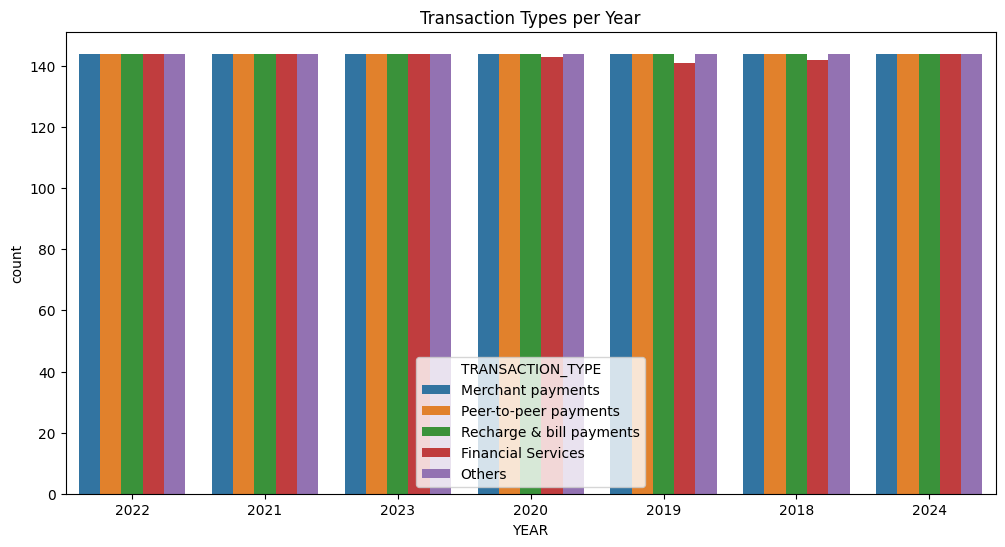

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transaction types over years
plt.figure(figsize=(12,6))
sns.countplot(data=df_agg_trans, x='YEAR', hue='TRANSACTION_TYPE')
plt.title("Transaction Types per Year")
plt.show()

Aggregated User

<ipython-input-96-777058595>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_grouped, x='YEAR', y='COUNT', palette='Blues_d')


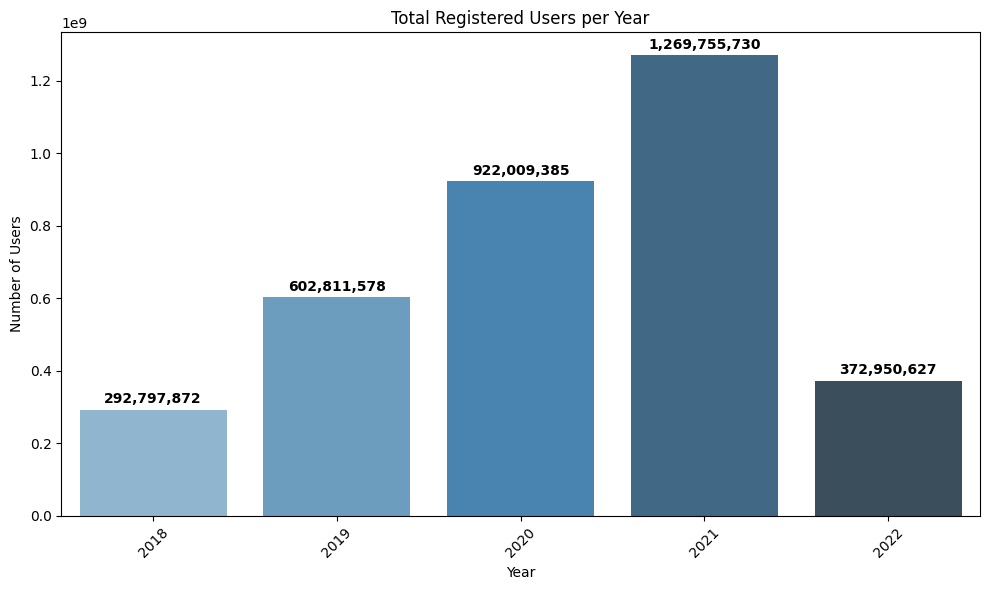

In [96]:
#Registered Users per Year
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data to get total registered users per year
df_grouped = df_agg_user.groupby('YEAR')['COUNT'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_grouped, x='YEAR', y='COUNT', palette='Blues_d')

# Annotate each bar with the count
for index, row in df_grouped.iterrows():
    barplot.text(x=index, y=row['COUNT'] + 1e7,  # adjust the vertical position slightly
                 s=f"{int(row['COUNT']):,}",     # formatted number with commas
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Title and labels
plt.title("Total Registered Users per Year")
plt.xlabel("Year")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<ipython-input-97-1488153636>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=brand_data, x="BRAND", y="COUNT", palette=colors)


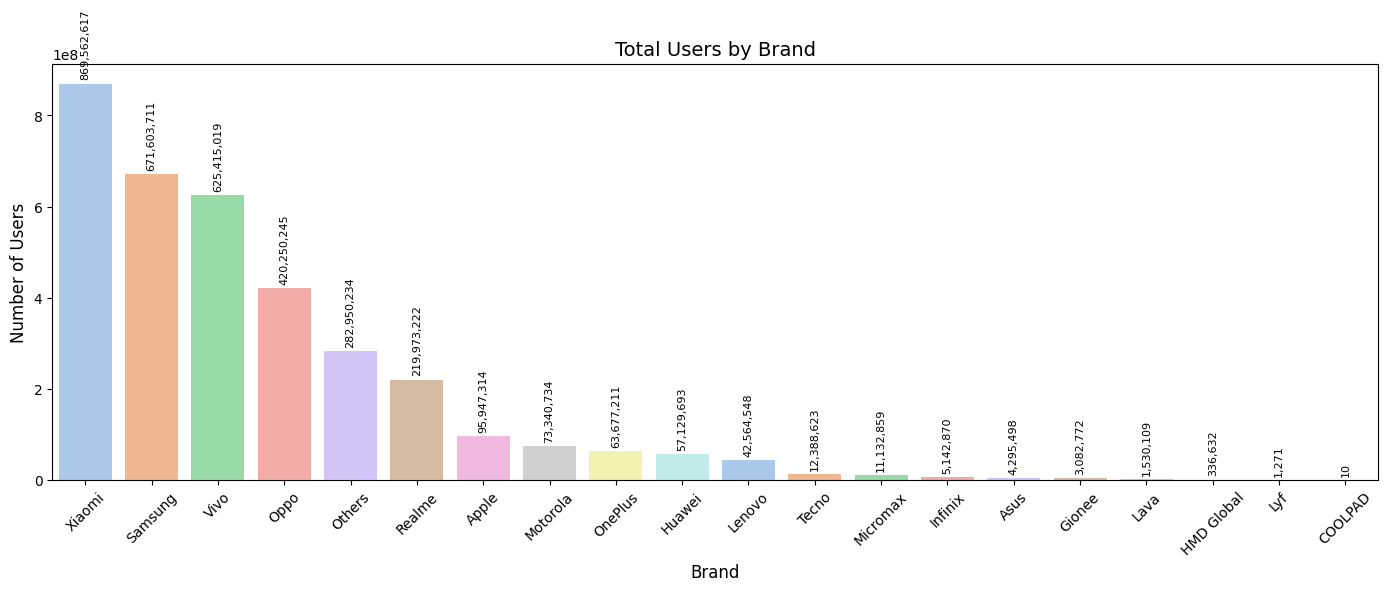

In [97]:
#Registered Users per Brand (across all years)
import matplotlib.pyplot as plt
import seaborn as sns

# Sort brand data by count
brand_data = df_agg_user.groupby("BRAND")["COUNT"].sum().reset_index()
brand_data = brand_data.sort_values(by="COUNT", ascending=False)

plt.figure(figsize=(14, 6))
colors = sns.color_palette("pastel", len(brand_data))

# Create the barplot
barplot = sns.barplot(data=brand_data, x="BRAND", y="COUNT", palette=colors)

# Add number labels on top of each bar
for i, row in enumerate(brand_data.itertuples()):
    value = int(row.COUNT)
    barplot.text(i, value + (0.01 * brand_data["COUNT"].max()), f"{value:,}",
                 ha='center', va='bottom', fontsize=8, rotation=90)

plt.title("Total Users by Brand", fontsize=14)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




 Map Transaction Data

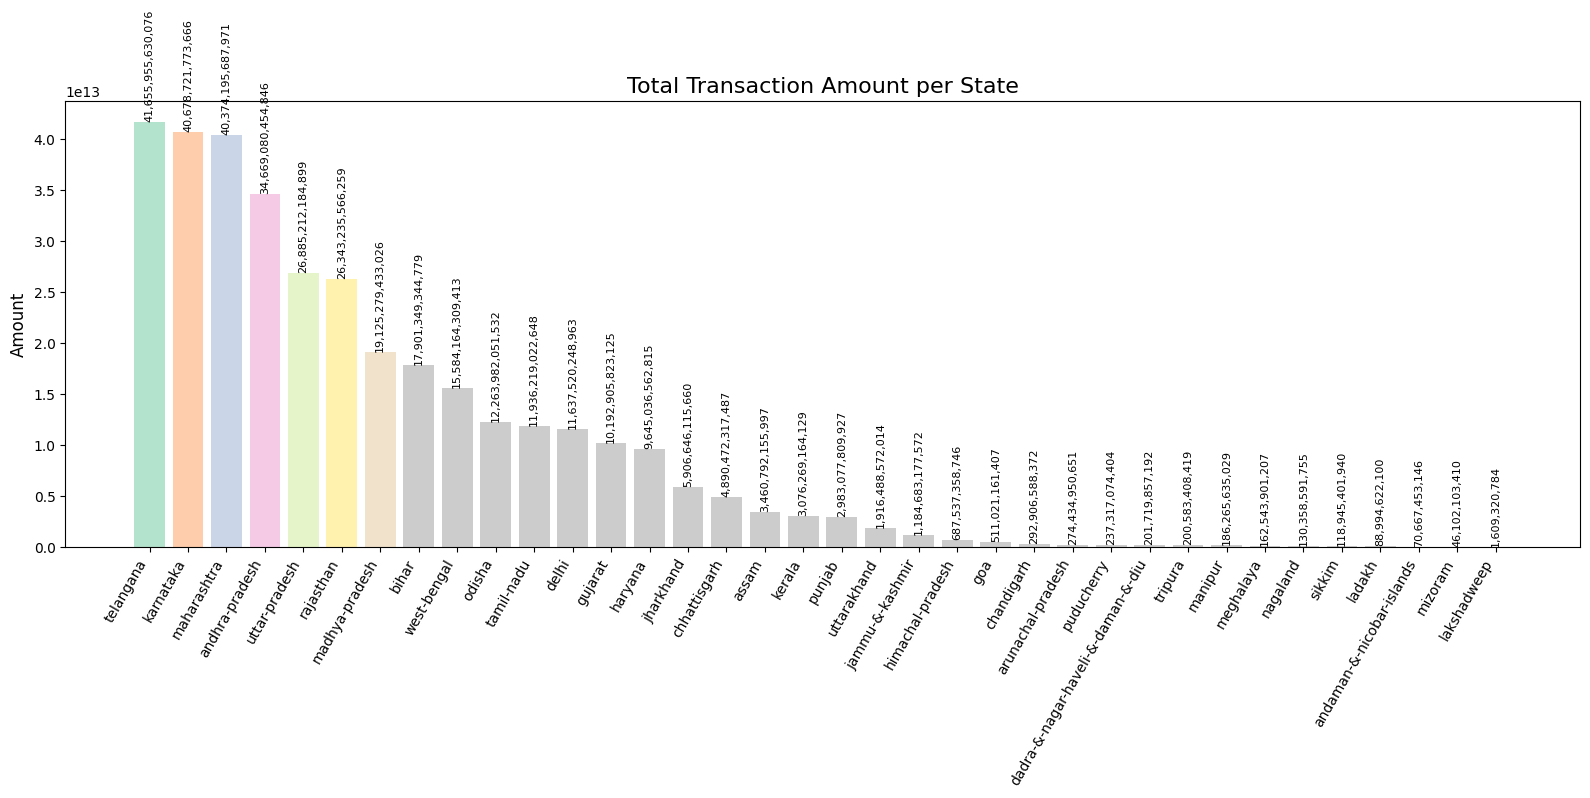

In [98]:
# Total amount per state
# Aggregate data
data = df_map_trans.groupby('STATE')['AMOUNT'].sum().sort_values(ascending=False)

# Set figure size large enough
plt.figure(figsize=(16, 8))

colors = plt.cm.Pastel2(range(len(data)))
bars = plt.bar(data.index, data.values, color=colors)

# Title and labels
plt.title("Total Transaction Amount per State", fontsize=16)
plt.ylabel("Amount", fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10)

# Add value labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}',
             ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

**Map User Data**

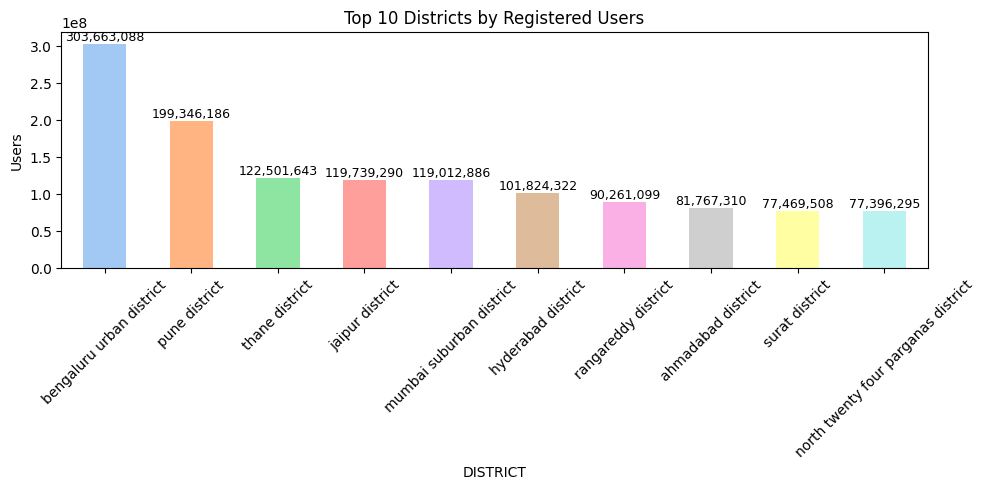

In [99]:
# Registered Users by Districts (Top 10)
top_districts = df_map_user.groupby('DISTRICT')['REGISTERED_USERS'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette("pastel")[:10]

ax = top_districts.plot(kind='bar', color=colors, title="Top 10 Districts by Registered Users", figsize=(10,5))
for i, val in enumerate(top_districts):
    ax.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.ylabel("Users")
plt.tight_layout()
plt.show()


**Top Transaction**

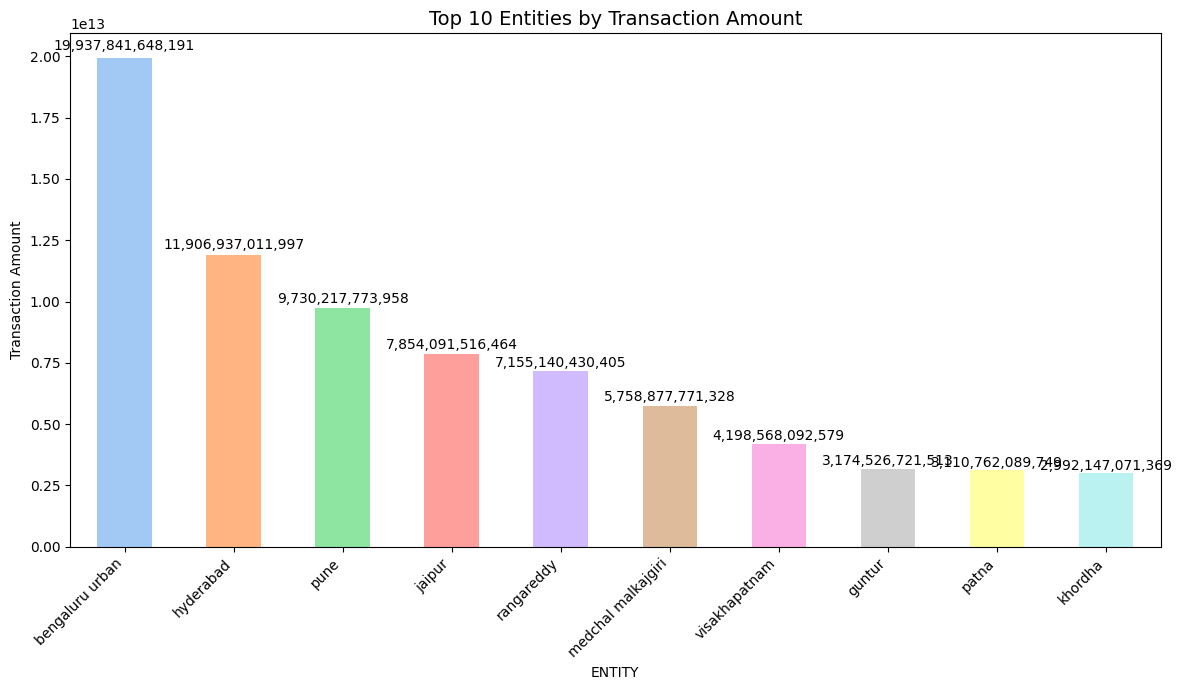

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 entities by transaction amount
top_entities = df_top_trans.groupby('ENTITY')['AMOUNT'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 7))
colors = sns.color_palette("pastel")[:10]
ax = top_entities.plot(kind='bar', color=colors)

# Add labels above bars with spacing
for i, val in enumerate(top_entities):
    ax.text(i, val + val*0.01, f'{int(val):,}', ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Entities by Transaction Amount", fontsize=14)
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Top User Data**

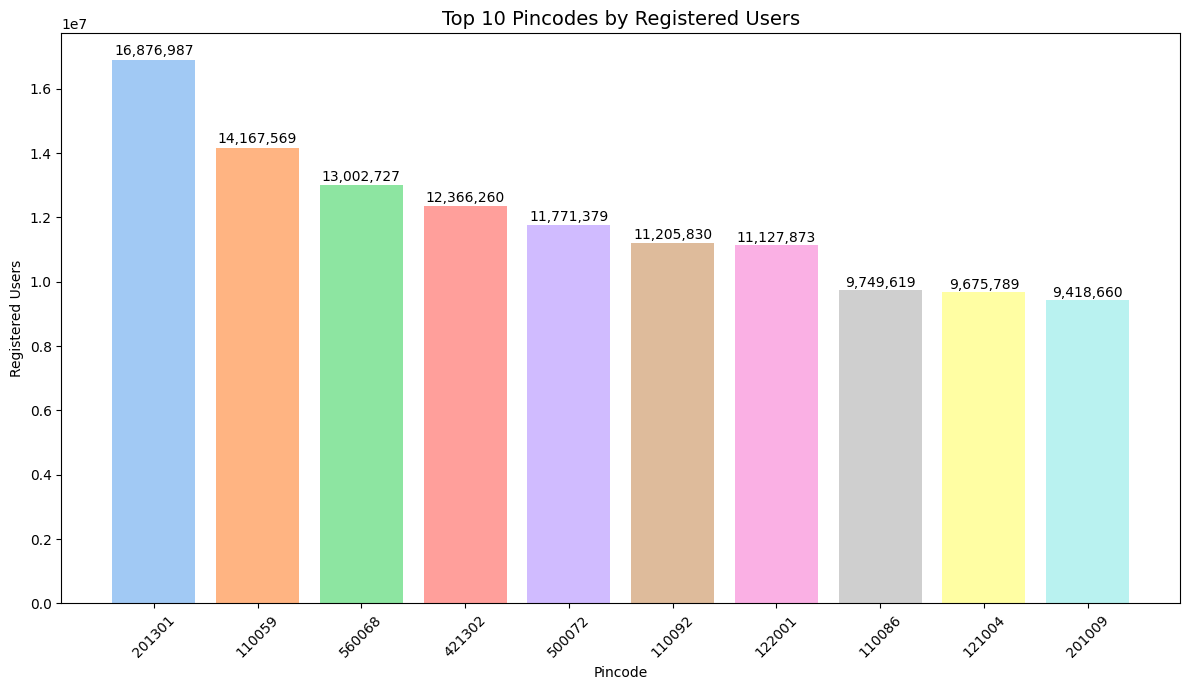

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 pincodes by registered users
top_users = df_top_user.groupby('PINCODE')['REGISTEREDUSERS'].sum().sort_values(ascending=False).head(10)

# Convert index to string to treat pincodes as categories
top_users.index = top_users.index.astype(str)

# Plot bar chart
plt.figure(figsize=(12, 7))
colors = sns.color_palette("pastel", n_colors=10)
bars = plt.bar(top_users.index, top_users.values, color=colors)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f'{int(yval):,}', ha='center', fontsize=10)

# Customize plot
plt.title("Top 10 Pincodes by Registered Users", fontsize=14)
plt.ylabel("Registered Users")
plt.xlabel("Pincode")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Aggregated Insurance**

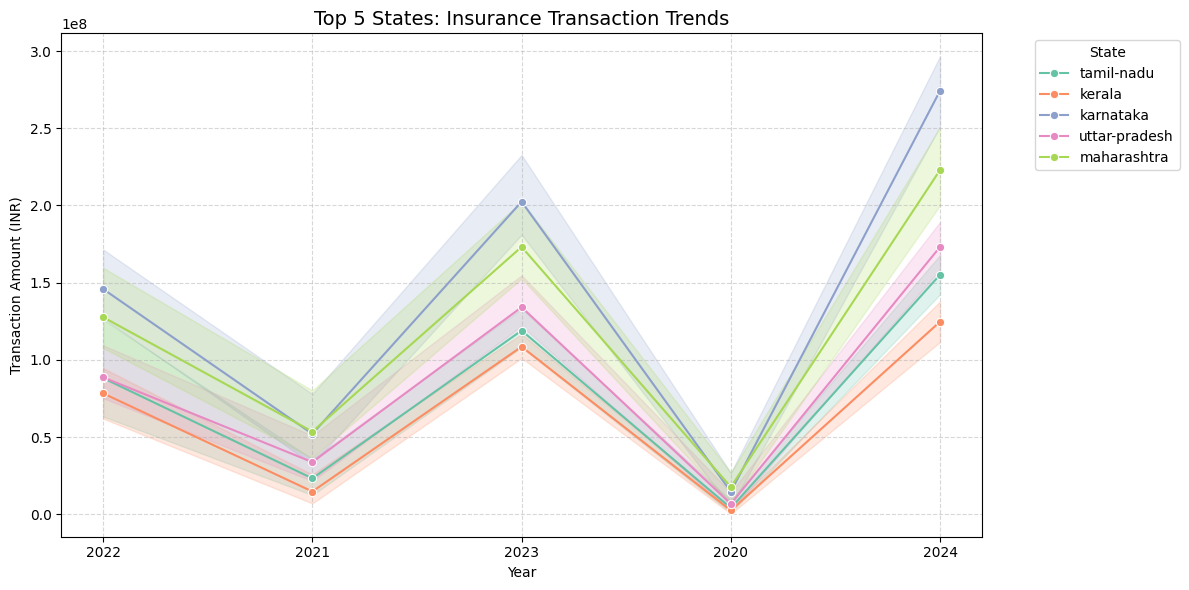

In [102]:
#Top 5 by total transaction amount
# First, remove commas or unwanted characters if any
df_agg_ins['TRANSACTION_AMOUNT'] = df_agg_ins['TRANSACTION_AMOUNT'].replace(',', '', regex=True)

# Convert to float
df_agg_ins['TRANSACTION_AMOUNT'] = pd.to_numeric(df_agg_ins['TRANSACTION_AMOUNT'], errors='coerce')

# Step 1: Calculate top 5 states by total transaction amount
top_states = df_agg_ins.groupby('STATE')['TRANSACTION_AMOUNT'].sum().nlargest(5).index

# Step 2: Filter the dataframe
filtered_df = df_agg_ins[df_agg_ins['STATE'].isin(top_states)]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='YEAR', y='TRANSACTION_AMOUNT', hue='STATE', marker='o', palette='Set2')

plt.title("Top 5 States: Insurance Transaction Trends", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Transaction Amount (INR)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




**Top Insurance Data**

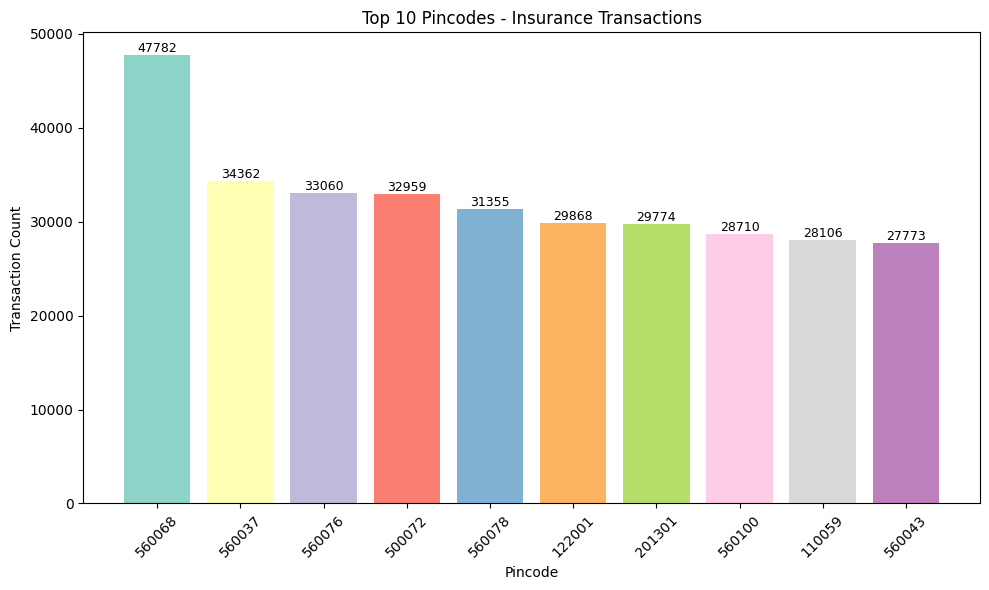

In [103]:
#Top Pincodes by Insurance Transaction Count

import matplotlib.pyplot as plt

# Convert TRANSACTION_COUNT to numeric
df_top_ins['TRANSACTION_COUNT'] = pd.to_numeric(df_top_ins['TRANSACTION_COUNT'], errors='coerce')

# Get top 10 pincodes
top_pins = df_top_ins.groupby('PINCODE')['TRANSACTION_COUNT'].sum().nlargest(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_pins.index.astype(str), top_pins.values, color=plt.cm.Set3.colors)

# Add number labels on top
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()),
             ha='center', va='bottom', fontsize=9)

plt.title("Top 10 Pincodes - Insurance Transactions")
plt.xlabel("Pincode")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [104]:
#Top 5 States Insurance Trends Over Years
import plotly.express as px
import pandas as pd

# Ensure TRANSACTION_AMOUNT is numeric
df_agg_ins['TRANSACTION_AMOUNT'] = pd.to_numeric(df_agg_ins['TRANSACTION_AMOUNT'], errors='coerce')

# Top 5 states
top_states = df_agg_ins.groupby('STATE')['TRANSACTION_AMOUNT'].sum().nlargest(5).index
filtered_df = df_agg_ins[df_agg_ins['STATE'].isin(top_states)]

fig = px.line(filtered_df, x='YEAR', y='TRANSACTION_AMOUNT', color='STATE',
              title="Top 5 States: Insurance Transaction Trend Over Years",
              markers=True)

fig.update_layout(xaxis_title='Year', yaxis_title='Transaction Amount (INR)', template='plotly_dark')
fig.show()


In [105]:
#Share of Top 5 States by Total Transaction Amount
top_state_data = df_agg_ins[df_agg_ins['STATE'].isin(top_states)]
state_totals = top_state_data.groupby('STATE')['TRANSACTION_AMOUNT'].sum().reset_index()

fig = px.pie(state_totals, names='STATE', values='TRANSACTION_AMOUNT',
             title='Share of Total Insurance Transactions (Top 5 States)',
             hole=0.4)  # donut chart

fig.update_traces(textinfo='percent+label')
fig.update_layout(template='plotly_dark')
fig.show()


In [106]:
#Insurance Trend for One State
one_state = df_agg_ins[df_agg_ins['STATE'] == top_states[0]]  # First top state

fig = px.area(one_state, x='YEAR', y='TRANSACTION_AMOUNT',
              title=f"Insurance Transaction Trend: {top_states[0]}", color_discrete_sequence=['orange'])

fig.update_layout(xaxis_title='Year', yaxis_title='Amount', template='plotly_white')
fig.show()


In [107]:
#State-wise Insurance Transaction Amount
state_totals = df_agg_ins.groupby('STATE')['TRANSACTION_AMOUNT'].sum().reset_index()
state_totals = state_totals.sort_values(by='TRANSACTION_AMOUNT', ascending=False)

fig = px.bar(state_totals, x='STATE', y='TRANSACTION_AMOUNT',
             title='Total Insurance Transaction Amount by State',
             text='TRANSACTION_AMOUNT', color='TRANSACTION_AMOUNT',
             color_continuous_scale='Plasma')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45, template='plotly_white')
fig.show()


In [108]:
#Year-wise Total Insurance Transaction Trend
year_totals = df_agg_ins.groupby('YEAR')['TRANSACTION_AMOUNT'].sum().reset_index()

fig = px.area(year_totals, x='YEAR', y='TRANSACTION_AMOUNT',
              title='Year-wise Total Insurance Transaction Amount',
              color_discrete_sequence=['mediumturquoise'])

fig.update_layout(template='plotly_dark')
fig.show()


In [109]:
#Distribution of Transactions Across States
fig = px.box(df_agg_ins, x='STATE', y='TRANSACTION_AMOUNT',
             title='Distribution of Insurance Transactions Across States',
             color='STATE')

fig.update_layout(xaxis_tickangle=-45, template='plotly_white')
fig.show()



In [110]:
#Frequency Distribution of Transaction Amounts
fig = px.histogram(df_agg_ins, x='TRANSACTION_AMOUNT', nbins=50,
                   title='Distribution of Insurance Transaction Amounts',
                   color_discrete_sequence=['salmon'])

fig.update_layout(template='plotly_white')
fig.show()


In [111]:
#Pincode-wise Transaction Count
top_pins = df_top_ins.groupby('PINCODE')['TRANSACTION_COUNT'].sum().nlargest(20).reset_index()

fig = px.treemap(top_pins, path=['PINCODE'], values='TRANSACTION_COUNT',
                 title='Top 20 Pincodes by Insurance Transactions')

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


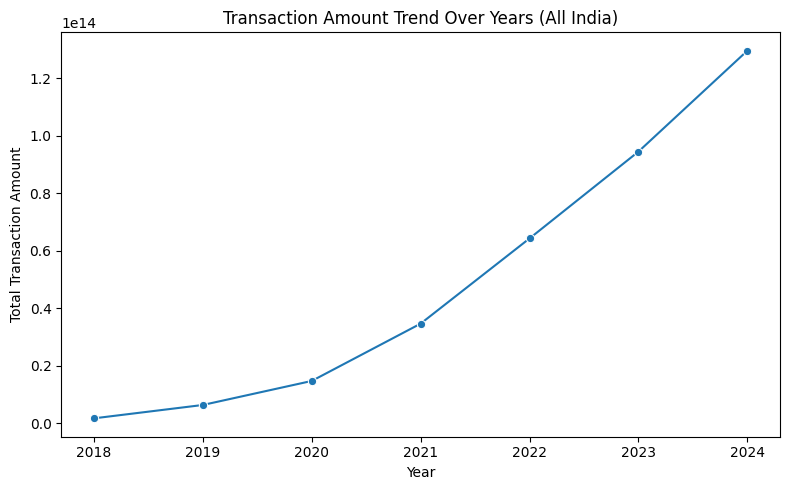

In [112]:
# Transaction Trend Over Years (All India)
year_trend = df_agg.groupby('Year')['Transaction_amount'].sum()
plt.figure(figsize=(8,5))
sns.lineplot(x=year_trend.index, y=year_trend.values, marker='o')
plt.title('Transaction Amount Trend Over Years (All India)')
plt.xlabel('Year')
plt.ylabel('Total Transaction Amount')
plt.tight_layout()
plt.show()

In [113]:
from google.colab import files

files.download('phonepe_agg_transaction.csv')
files.download('phonepe_user.csv')
files.download('phonepe_map_transaction.csv')
files.download('phonepe_top_transaction.csv')
files.download('phonepe_map_user.csv')
files.download('phonepe_top_user.csv')
files.download('phonepe_agg_insurance.csv')
files.download('phonepe_map_insurance.csv')
files.download('phonepe_top_insurance.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
import pandas as pd

# List of Indian states from PhonePe Pulse
states = [
    'andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh', 'assam', 'bihar',
    'chandigarh', 'chhattisgarh', 'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa',
    'gujarat', 'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand', 'karnataka',
    'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh', 'maharashtra', 'manipur', 'meghalaya',
    'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil-nadu',
    'telangana', 'tripura', 'uttar-pradesh', 'uttarakhand', 'west-bengal'
]

years = [2018, 2019, 2020, 2021, 2022, 2023]
quarters = [1, 2, 3, 4]

# Create the combinations
dim_table = pd.DataFrame([
    {'State': state, 'Year': year, 'Quarter': quarter}
    for state in states
    for year in years
    for quarter in quarters
])

# Save to CSV
dim_table.to_csv("dim_state_year_quarter.csv", index=False)
print("CSV created successfully!")


CSV created successfully!


In [115]:
from google.colab import files
files.download("dim_state_year_quarter.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [116]:
# Filter for 2018 and 2019
df_check = df_agg[df_agg['Year'].isin(['2018', '2019'])]

# See how many rows exist and whether Transaction_amount is present
print("Total rows:", len(df_check))
print(df_check[['State', 'Year', 'Quater', 'Transaction_type', 'Transaction_amount']].head(10))


Total rows: 1435
         State  Year  Quater          Transaction_type  Transaction_amount
80  chandigarh  2019       1     Peer-to-peer payments        2.123867e+09
81  chandigarh  2019       1  Recharge & bill payments        1.614149e+08
82  chandigarh  2019       1         Merchant payments        9.723047e+07
83  chandigarh  2019       1        Financial Services        9.170309e+05
84  chandigarh  2019       1                    Others        1.260301e+07
85  chandigarh  2019       3     Peer-to-peer payments        2.815184e+09
86  chandigarh  2019       3         Merchant payments        2.265359e+08
87  chandigarh  2019       3  Recharge & bill payments        2.138849e+08
88  chandigarh  2019       3        Financial Services        7.949187e+05
89  chandigarh  2019       3                    Others        1.328221e+07
